In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)

In [2]:
# Reading the CSV file
df = pd.read_csv('training.csv')

# Displaying the first few rows of the DataFrame to understand the structure and columns
df.head()

,InPlay,Velo,SpinRate,HorzBreak,InducedVertBreak
0,0,95.33,2893.0,10.68,21.33
1,0,94.41,2038.0,17.13,5.77
2,0,90.48,2183.0,6.61,15.39
3,0,93.04,2279.0,9.33,14.57
4,0,95.17,2384.0,6.99,17.62


# Basic Information

In [3]:
# Calculating basic statistical measures for each column
df.describe()

,InPlay,Velo,SpinRate,HorzBreak,InducedVertBreak
count,10000.000000,10000.000000,9994.000000,10000.000000,10000.000000
mean,0.271700,93.957429,2238.952471,9.549388,14.173489
std,0.444858,2.683740,196.041323,5.051887,4.607593
min,0.000000,59.760000,770.000000,-6.270000,-6.820000
25%,0.000000,92.540000,2107.000000,5.730000,11.360000
50%,0.000000,94.100000,2241.000000,9.430000,15.160000
75%,1.000000,95.660000,2367.000000,13.600000,17.630000
max,1.000000,102.040000,3061.000000,28.040000,24.860000


# Data Preprocessing

In [4]:
# Checking for missing values in the dataset
missing_values_count = df.isnull().sum()
missing_values_count

InPlay              0
Velo                0
SpinRate            6
HorzBreak           0
InducedVertBreak    0
dtype: int64

In [5]:
# Identify the rows where 'SpinRate' was missing in the original dataset
missing_spinrate_rows = df[df['SpinRate'].isnull()]

missing_spinrate_rows

,InPlay,Velo,SpinRate,HorzBreak,InducedVertBreak
612,1,94.28,NaN,13.53,14.86
1890,0,91.40,NaN,16.39,-0.97
3619,0,95.97,NaN,13.74,17.66
5282,0,94.70,NaN,8.13,10.93
8611,0,92.37,NaN,11.63,15.63
9007,0,93.31,NaN,15.89,2.20


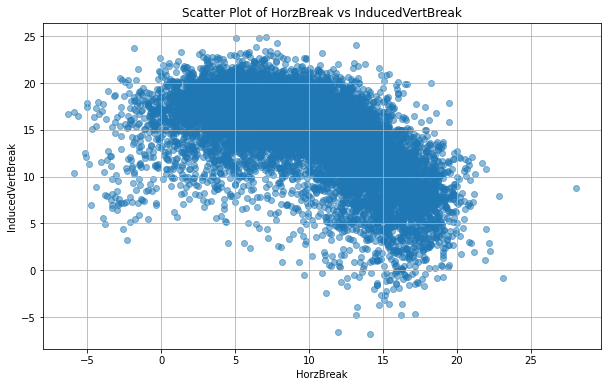

In [6]:
# Create a scatter plot for HorzBreak and InducedVertBreak
plt.figure(figsize=(10, 6))
plt.scatter(df['HorzBreak'], df['InducedVertBreak'], alpha=0.5)
plt.xlabel('HorzBreak')
plt.ylabel('InducedVertBreak')
plt.title('Scatter Plot of HorzBreak vs InducedVertBreak')
plt.grid(True)
plt.show()

In [7]:
from sklearn.impute import KNNImputer

# Create a DataFrame containing only the relevant features and target for imputation
df_for_imputation = df[['Velo', 'HorzBreak', 'InducedVertBreak', 'SpinRate']]

# Initialize KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the DataFrame
imputed_data = pd.DataFrame(imputer.fit_transform(df_for_imputation), columns=df_for_imputation.columns)

# Check if missing values are imputed
imputed_data.isnull().sum()

Velo                0
HorzBreak           0
InducedVertBreak    0
SpinRate            0
dtype: int64

In [8]:
# Retrieve the imputed rows for which 'SpinRate' was missing
imputed_rows = imputed_data.loc[missing_spinrate_rows.index]

# Display the imputed rows
imputed_rows

,Velo,HorzBreak,InducedVertBreak,SpinRate
612,94.28,13.53,14.86,2361.4
1890,91.40,16.39,-0.97,1912.6
3619,95.97,13.74,17.66,2414.8
5282,94.70,8.13,10.93,2128.6
8611,92.37,11.63,15.63,2183.0
9007,93.31,15.89,2.20,1980.2


In [9]:
# Replace the missing 'SpinRate' values in a copy of the original df DataFrame and name it df_imputed
df_imputed = df.copy()
df_imputed.loc[df['SpinRate'].isnull(), 'SpinRate'] = imputed_rows['SpinRate']

# Recalculate basic statistical measures for the 'SpinRate' column after imputation
spinrate_stats_before = df['SpinRate'].describe()
spinrate_stats_after = df_imputed['SpinRate'].describe()

print('Before:\n', spinrate_stats_before)
print('\nAfter:\n', spinrate_stats_after)

Before:
 count    9994.000000
mean     2238.952471
std       196.041323
min       770.000000
25%      2107.000000
50%      2241.000000
75%      2367.000000
max      3061.000000
Name: SpinRate, dtype: float64

After:
 count    10000.000000
mean      2238.907160
std        196.042361
min        770.000000
25%       2107.000000
50%       2241.000000
75%       2367.000000
max       3061.000000
Name: SpinRate, dtype: float64


# Modeling

In [10]:
from sklearn.model_selection import train_test_split

# Features and target variable
features = ['Velo', 'SpinRate', 'HorzBreak', 'InducedVertBreak']
target = 'InPlay'

# Split the data into training and test sets
X = df_imputed[features]
y = df_imputed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Initialize and train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

accuracy_lr, conf_matrix_lr, accuracy_rf, conf_matrix_rf, accuracy_svm, conf_matrix_svm

(0.7315,
 array([[1463,    0],
        [ 537,    0]]),
 0.7175,
 array([[1388,   75],
        [ 490,   47]]),
 0.7315,
 array([[1463,    0],
        [ 537,    0]]))

In [12]:
# Manually balancing the classes by oversampling the minority class
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df_imputed[df_imputed.InPlay == 0]
df_minority = df_imputed[df_imputed.InPlay == 1]

# Oversample the minority class
df_minority_oversampled=resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine majority class with oversampled minority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# New target and features
X_oversampled = df_oversampled[features]
y_oversampled = df_oversampled[target]

# Split the oversampled data into training and test sets
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

In [ ]:
# Retrain the Logistic Regression model with oversampled data
lr_model_os = LogisticRegression(random_state=42)
lr_model_os.fit(X_train_os, y_train_os)

# Make predictions on the test set
y_pred_lr_os = lr_model_os.predict(X_test_os)

# Evaluate the model
accuracy_lr_os = accuracy_score(y_test_os, y_pred_lr_os)
conf_matrix_lr_os = confusion_matrix(y_test_os, y_pred_lr_os)

# Retrain the Random Forest model with the oversampled data
rf_model_os = RandomForestClassifier(random_state=42)
rf_model_os.fit(X_train_os, y_train_os)

# Make predictions on the test set
y_pred_rf_os = rf_model_os.predict(X_test_os)

# Evaluate the model
accuracy_rf_os = accuracy_score(y_test_os, y_pred_rf_os)
conf_matrix_rf_os = confusion_matrix(y_test_os, y_pred_rf_os)

# Retrain the SVM model with the oversampled data
svm_model_os = SVC(probability=True, random_state=42)
svm_model_os.fit(X_train_os, y_train_os)

# Make predictions on the test set
y_pred_svm_os = svm_model_os.predict(X_test_os)

# Evaluate the model
accuracy_svm_os = accuracy_score(y_test_os, y_pred_svm_os)
conf_matrix_svm_os = confusion_matrix(y_test_os, y_pred_svm_os)

accuracy_lr_os, conf_matrix_lr_os, accuracy_rf_os, conf_matrix_rf_os, accuracy_svm_os, conf_matrix_svm_os

# Prediction

In [ ]:
# Read the deploy.csv file
df_deploy = pd.read_csv('deploy.csv')

# Display basic statistics
basic_stats_deploy = df_deploy.describe()

# Check for missing values
missing_values_deploy = df_deploy.isnull().sum()

basic_stats_deploy, missing_values_deploy

In [ ]:
# Identify the rows where 'SpinRate' was missing in the original dataset
missing_spinrate_rows_deploy = df_deploy[df_deploy['SpinRate'].isnull()]

missing_spinrate_rows_deploy

In [ ]:
from sklearn.impute import KNNImputer

# Create a DataFrame containing only the relevant features and target for imputation
df_deploy_for_imputation = df_deploy[['Velo', 'HorzBreak', 'InducedVertBreak', 'SpinRate']]

# Apply the imputer to the DataFrame
imputed_data_deploy = pd.DataFrame(imputer.fit_transform(df_deploy_for_imputation), columns=df_deploy_for_imputation.columns)

# Check if missing values are imputed
imputed_data_deploy.isnull().sum()

In [ ]:
# Retrieve the imputed rows for which 'SpinRate' was missing
imputed_rows_deploy = imputed_data_deploy.loc[missing_spinrate_rows_deploy.index]

# Display the imputed rows
imputed_rows_deploy

In [ ]:
# Replace the missing 'SpinRate' values in a copy of the original df DataFrame and name it df_imputed
df_deploy_imputed = df_deploy.copy()
df_deploy_imputed.loc[df_deploy['SpinRate'].isnull(), 'SpinRate'] = imputed_rows_deploy['SpinRate']

# Recalculate basic statistical measures for the 'SpinRate' column after imputation
spinrate_stats_before = df_deploy['SpinRate'].describe()
spinrate_stats_after = df_deploy_imputed['SpinRate'].describe()

print('Before:\n', spinrate_stats_before)
print('\nAfter:\n', spinrate_stats_after)

In [ ]:
# Select the features for prediction in deploy.csv
X_deploy = df_deploy_imputed[features]

# Use the Random Forest model trained on oversampled data to make predictions on deploy.csv
y_deploy_pred = rf_model_os.predict_proba(X_deploy)[:, 1]

# Create a submission DataFrame
df_submission = df_deploy.assign(InPlay = y_deploy_pred)

# Save the submission DataFrame to a CSV file
df_submission.to_csv('submission.csv', index=False)

df_submission